In [4]:
import pandas as pd
import os

# Define base data directory
RAW_DATA_DIR = os.path.abspath("../../data/raw")

# Load datasets
ndt = pd.read_csv(os.path.join(RAW_DATA_DIR, "ndt.csv"))
print("Non-derivative transactions shape: ", ndt.shape)
assert ndt.shape == (255414, 48)

Non-derivative transactions shape:  (255414, 48)


/var/folders/d2/h05xc7x1181fd8jxpltdv9v40000gn/T/ipykernel_88965/3659457299.py:8: DtypeWarning: Columns (5,11,17,21,38) have mixed types. Specify dtype option on import or set low_memory=False.
  ndt = pd.read_csv(os.path.join(RAW_DATA_DIR, "ndt.csv"))


In [14]:
print(ndt.head(1000).to_markdown())

|     | ACCESSION_NUMBER     |   NONDERIV_TRANS_SK | SECURITY_TITLE                                | SECURITY_TITLE_FN   | TRANS_DATE_FN   | DEEMED_EXECUTION_DATE_FN   |   TRANS_FORM_TYPE | TRANS_CODE   |   EQUITY_SWAP_INVOLVED | EQUITY_SWAP_TRANS_CD_FN   | TRANS_TIMELINESS   |   TRANS_TIMELINESS_FN |     TRANS_SHARES | TRANS_SHARES_FN   |   TRANS_PRICEPERSHARE | TRANS_PRICEPERSHARE_FN   | TRANS_ACQUIRED_DISP_CD   |   TRANS_ACQUIRED_DISP_CD_FN |   SHRS_OWND_FOLWNG_TRANS | SHRS_OWND_FOLWNG_TRANS_FN   |   VALU_OWND_FOLWNG_TRANS |   VALU_OWND_FOLWNG_TRANS_FN | DIRECT_INDIRECT_OWNERSHIP   | DIRECT_INDIRECT_OWNERSHIP_FN   | NATURE_OF_OWNERSHIP                                                                  | NATURE_OF_OWNERSHIP_FN   | FILE_MEMBERSHIP   | TRANS_DATE   | DEEMED_EXECUTION_DATE   | ACCESSION_NUMBER.1   |   NONDERIV_HOLDING_SK | SECURITY_TITLE.1                              | SECURITY_TITLE_FN.1   |   TRANS_FORM_TYPE.1 |   TRANS_FORM_TYPE_FN |   SHRS_OWND_FOLWNG_TRANS.1 | SHRS_

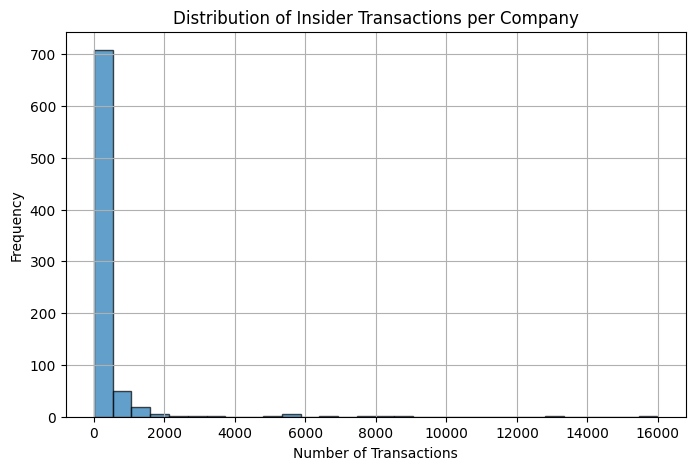

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each COMPANY_ID
company_counts = ndt["COMPANY_ID"].value_counts()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(company_counts, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.title("Distribution of Insider Transactions per Company")
# plt.yscale("log")  # Optional: log scale to better visualize distribution
plt.grid(True)

plt.show()

In [20]:
print(ndt.head(1000).to_markdown())

|     | ACCESSION_NUMBER     |   NONDERIV_TRANS_SK | SECURITY_TITLE                                | SECURITY_TITLE_FN   | TRANS_DATE_FN   | DEEMED_EXECUTION_DATE_FN   |   TRANS_FORM_TYPE | TRANS_CODE   |   EQUITY_SWAP_INVOLVED | EQUITY_SWAP_TRANS_CD_FN   | TRANS_TIMELINESS   |   TRANS_TIMELINESS_FN |     TRANS_SHARES | TRANS_SHARES_FN   |   TRANS_PRICEPERSHARE | TRANS_PRICEPERSHARE_FN   | TRANS_ACQUIRED_DISP_CD   |   TRANS_ACQUIRED_DISP_CD_FN |   SHRS_OWND_FOLWNG_TRANS | SHRS_OWND_FOLWNG_TRANS_FN   |   VALU_OWND_FOLWNG_TRANS |   VALU_OWND_FOLWNG_TRANS_FN | DIRECT_INDIRECT_OWNERSHIP   | DIRECT_INDIRECT_OWNERSHIP_FN   | NATURE_OF_OWNERSHIP                                                                  | NATURE_OF_OWNERSHIP_FN   | FILE_MEMBERSHIP   | TRANS_DATE   | DEEMED_EXECUTION_DATE   | ACCESSION_NUMBER.1   |   NONDERIV_HOLDING_SK | SECURITY_TITLE.1                              | SECURITY_TITLE_FN.1   |   TRANS_FORM_TYPE.1 |   TRANS_FORM_TYPE_FN |   SHRS_OWND_FOLWNG_TRANS.1 | SHRS_

In [19]:
count = ndt[(ndt["TRANS_SHARES"].notna()) & (ndt["SHRS_OWND_FOLWNG_TRANS"].isna())].shape[0]
print(count)

# Drop rows where SHRS_OWND_FOLWNG_TRANS is nan
ndt = ndt[~((ndt["TRANS_SHARES"].notna()) & (ndt["SHRS_OWND_FOLWNG_TRANS"].isna()))]
print(ndt.shape)


0
(255383, 48)
Index(['ACCESSION_NUMBER', 'NONDERIV_TRANS_SK', 'SECURITY_TITLE',
       'SECURITY_TITLE_FN', 'TRANS_DATE_FN', 'DEEMED_EXECUTION_DATE_FN',
       'TRANS_FORM_TYPE', 'TRANS_CODE', 'EQUITY_SWAP_INVOLVED',
       'EQUITY_SWAP_TRANS_CD_FN', 'TRANS_TIMELINESS', 'TRANS_TIMELINESS_FN',
       'TRANS_SHARES', 'TRANS_SHARES_FN', 'TRANS_PRICEPERSHARE',
       'TRANS_PRICEPERSHARE_FN', 'TRANS_ACQUIRED_DISP_CD',
       'TRANS_ACQUIRED_DISP_CD_FN', 'SHRS_OWND_FOLWNG_TRANS',
       'SHRS_OWND_FOLWNG_TRANS_FN', 'VALU_OWND_FOLWNG_TRANS',
       'VALU_OWND_FOLWNG_TRANS_FN', 'DIRECT_INDIRECT_OWNERSHIP',
       'DIRECT_INDIRECT_OWNERSHIP_FN', 'NATURE_OF_OWNERSHIP',
       'NATURE_OF_OWNERSHIP_FN', 'FILE_MEMBERSHIP', 'TRANS_DATE',
       'DEEMED_EXECUTION_DATE', 'ACCESSION_NUMBER.1', 'NONDERIV_HOLDING_SK',
       'SECURITY_TITLE.1', 'SECURITY_TITLE_FN.1', 'TRANS_FORM_TYPE.1',
       'TRANS_FORM_TYPE_FN', 'SHRS_OWND_FOLWNG_TRANS.1',
       'SHRS_OWND_FOLWNG_TRANS_FN.1', 'VALU_OWND_FOLWNG_TRA

In [30]:
filtered_ndt = ndt[
    [
        "COMPANY_ID",
        "TRANS_CODE",
        "TRANS_SHARES",
        "TRANS_PRICEPERSHARE",
        "SHRS_OWND_FOLWNG_TRANS",
        "DIRECT_INDIRECT_OWNERSHIP",
        "TRANS_DATE"
    ]
]

filtered_ndt["MONTH_END"] = pd.to_datetime(filtered_ndt["TRANS_DATE"]) + pd.offsets.MonthEnd(0)

# Filter only rows where TRANS_CODE is one of "P", "M", or "S"
filtered_ndt = filtered_ndt[filtered_ndt["TRANS_CODE"].isin(["P", "M", "S"])]

/var/folders/d2/h05xc7x1181fd8jxpltdv9v40000gn/T/ipykernel_88965/610070045.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ndt["MONTH_END"] = pd.to_datetime(filtered_ndt["TRANS_DATE"]) + pd.offsets.MonthEnd(0)


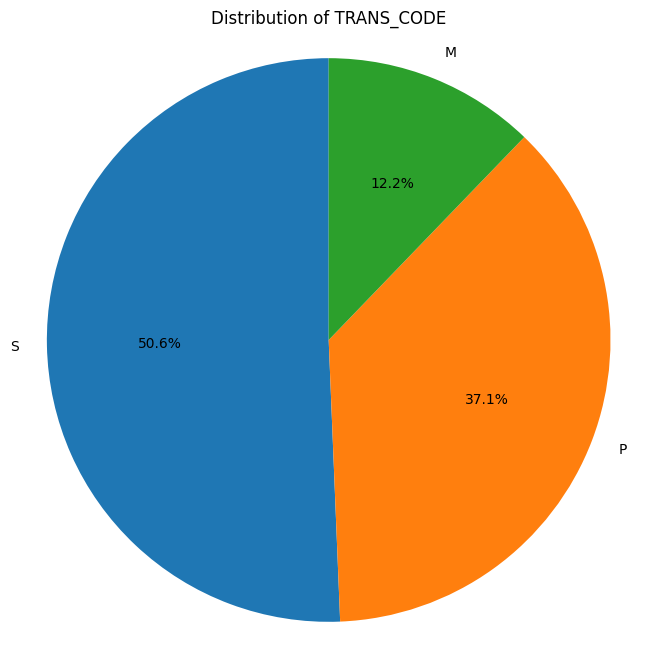

In [31]:
import matplotlib.pyplot as plt

# Count how many times each TRANS_CODE appears
trans_counts = filtered_ndt['TRANS_CODE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(trans_counts, labels=trans_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TRANS_CODE')
plt.axis('equal')  # This makes the pie chart a circle.
plt.show()

In [36]:
# Load datasets
PROCCESSED_DATA_DIR = os.path.abspath("../../data/processed")
sage_factors = pd.read_csv(os.path.join(PROCCESSED_DATA_DIR, "sage_factors.csv"))
returns = sage_factors[["MONTH_END", "COMPANY_ID", "EXCESS_RETURN_USD_LN"]]
# Convert returns["MONTH_END"] to datetime
returns["MONTH_END"] = pd.to_datetime(returns["MONTH_END"])
print("Returns shape: ", returns.shape)
assert returns.shape == (120624, 3)

Returns shape:  (120624, 3)


/var/folders/d2/h05xc7x1181fd8jxpltdv9v40000gn/T/ipykernel_88965/1883674337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns["MONTH_END"] = pd.to_datetime(returns["MONTH_END"])


In [37]:
print(returns.columns)

Index(['MONTH_END', 'COMPANY_ID', 'EXCESS_RETURN_USD_LN'], dtype='object')


In [38]:

ndt_with_returns = pd.merge(filtered_ndt, returns, on=["COMPANY_ID", "MONTH_END"], how="left")

In [39]:
print(ndt_with_returns.head(1000).to_markdown())

|     |   COMPANY_ID | TRANS_CODE   |     TRANS_SHARES |   TRANS_PRICEPERSHARE |   SHRS_OWND_FOLWNG_TRANS | DIRECT_INDIRECT_OWNERSHIP   | TRANS_DATE   | MONTH_END           |   EXCESS_RETURN_USD_LN |
|----:|-------------:|:-------------|-----------------:|----------------------:|-------------------------:|:----------------------------|:-------------|:--------------------|-----------------------:|
|   0 |        29753 | S            |   4957           |                 81.07 |         414552           | D                           | 2013-09-26   | 2013-09-30 00:00:00 |          nan           |
|   1 |        29753 | S            |  15043           |                 81.6  |         399509           | D                           | 2013-09-26   | 2013-09-30 00:00:00 |          nan           |
|   2 |        29753 | M            |  20000           |                 10.49 |         419509           | D                           | 2013-09-26   | 2013-09-30 00:00:00 |          nan           |
